In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi DataFrame olarak oluşturma
data = {
    'Atık Dönüşüm Türü': ['Enerjiye Dönüşenler', 'Enerjiye Dönüşenler', 'Enerjiye Dönüşenler', 'Enerjiye Dönüşenler', 'Enerjiye Dönüşenler',
                          'Çöplüklere Gönderilmekten Kurtarılanlar', 'Çöplüklere Gönderilmekten Kurtarılanlar',
                          'Çöplüklere Gönderilmekten Kurtarılanlar', 'Çöplüklere Gönderilmekten Kurtarılanlar',
                          'Çöplüklere Gönderilmekten Kurtarılanlar'],
    'Yıl': [2023, 2022, 2021, 2020, 2019,
            2023, 2022, 2021, 2020, 2019],
    'Miktar (Pounds)': [5713790, 1197570, 657890, 786250, 1129080,
                        1095896140, 1152014260, 923735780, 881848000, 710886640]
}
df = pd.DataFrame(data)

# 'Yıl' sütununu sıralama
df = df.sort_values(by=['Atık Dönüşüm Türü', 'Yıl'])

print(df.head())

     Atık Dönüşüm Türü   Yıl  Miktar (Pounds)
4  Enerjiye Dönüşenler  2019          1129080
3  Enerjiye Dönüşenler  2020           786250
2  Enerjiye Dönüşenler  2021           657890
1  Enerjiye Dönüşenler  2022          1197570
0  Enerjiye Dönüşenler  2023          5713790


1. Atık Dönüşüm Türlerinin Yıllara Göre Miktar Değişimi (Çizgi Grafiği)
Bu grafik, her bir atık dönüşüm türünün zaman içindeki eğilimini açıkça gösterir. Özellikle farklı büyüklükteki değerleri aynı grafikte görselleştirirken, dikey eksenin logaritmik ölçeklendirilmesi büyük miktarları daha anlaşılır kılar.

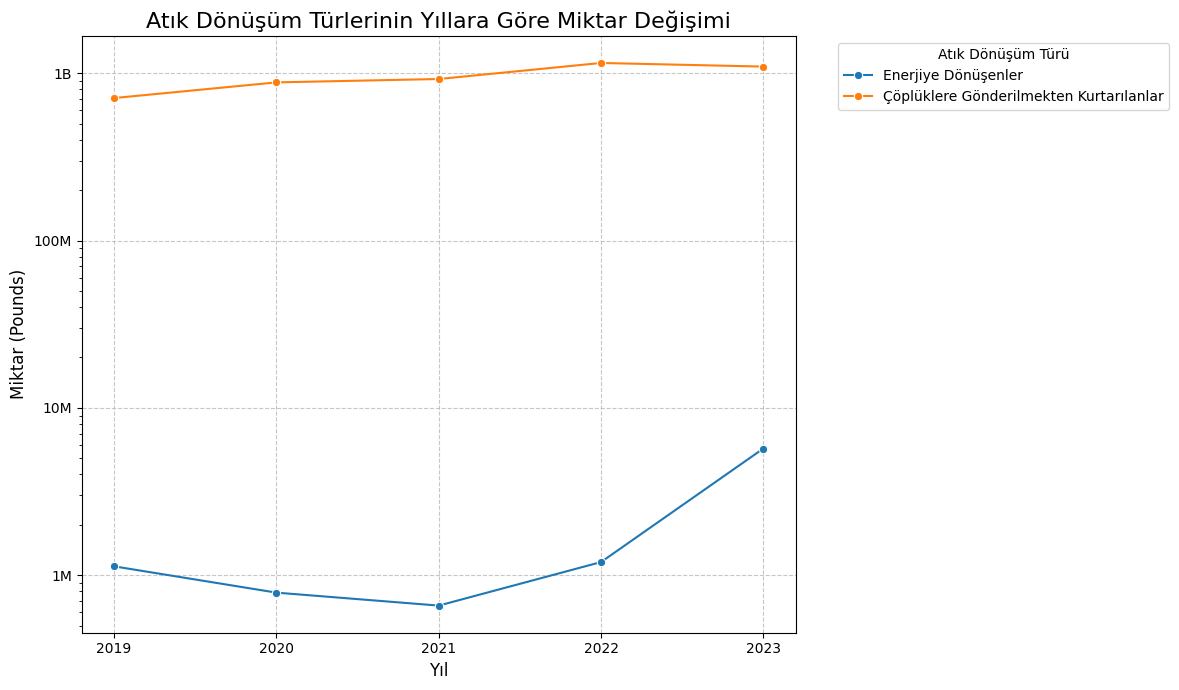

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker # Yeni eklenen kütüphane

# Veriyi DataFrame olarak oluşturma
data = {
    'Atık Dönüşüm Türü': ['Enerjiye Dönüşenler', 'Enerjiye Dönüşenler', 'Enerjiye Dönüşenler', 'Enerjiye Dönüşenler', 'Enerjiye Dönüşenler',
                          'Çöplüklere Gönderilmekten Kurtarılanlar', 'Çöplüklere Gönderilmekten Kurtarılanlar',
                          'Çöplüklere Gönderilmekten Kurtarılanlar', 'Çöplüklere Gönderilmekten Kurtarılanlar',
                          'Çöplüklere Gönderilmekten Kurtarılanlar'],
    'Yıl': [2023, 2022, 2021, 2020, 2019,
            2023, 2022, 2021, 2020, 2019],
    'Miktar (Pounds)': [5713790, 1197570, 657890, 786250, 1129080,
                        1095896140, 1152014260, 923735780, 881848000, 710886640]
}
df = pd.DataFrame(data)

# 'Yıl' sütununu sıralama
df = df.sort_values(by=['Atık Dönüşüm Türü', 'Yıl'])

plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='Yıl', y='Miktar (Pounds)', hue='Atık Dönüşüm Türü', marker='o')
plt.title('Atık Dönüşüm Türlerinin Yıllara Göre Miktar Değişimi', fontsize=16)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Miktar (Pounds)', fontsize=12)
plt.xticks(df['Yıl'].unique().astype(int)) # Yıl eksenindeki etiketleri tam sayı olarak göster
plt.yscale('log') # Y eksenini logaritmik ölçeklendirme

# Logaritmik eksende bilimsel notasyonu daha okunur hale getirme
# Küçük değerler için bilimsel notasyonu koruyabilir veya tamamen kaldırabilirsiniz.
# Burada, daha büyük sayılar için bilimsel notasyonu koruyup daha düzenli bir görünüm sağlıyoruz.
# İhtiyacınıza göre formatter'ı değiştirebilirsiniz.

# Örnek 1: Daha sade bir LogFormatterSciNotation kullanımı (varsayılan bilimsel notasyon)
# ax = plt.gca() # Mevcut ekseni al
# ax.yaxis.set_major_formatter(mticker.LogFormatter(labelOnlyBase=False, minor_thresholds=(0.75, 0.75)))


# Örnek 2: Miktarları doğrudan sayı olarak göstermek için FuncFormatter kullanma (tavsiye edilir)
# Bu yöntem, eksen etiketlerini milyonlar, milyarlar gibi daha okunur formatlara dönüştürmenize de olanak tanır.
def custom_formatter(x, pos):
    if x >= 1e9:
        return f'{x*1e-9:.0f}B' # Milyarlar
    elif x >= 1e6:
        return f'{x*1e-6:.0f}M' # Milyonlar
    elif x >= 1e3:
        return f'{x*1e-3:.0f}K' # Binler
    else:
        return f'{x:.0f}'

ax = plt.gca() # Mevcut ekseni al
ax.yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))


plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Atık Dönüşüm Türü', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

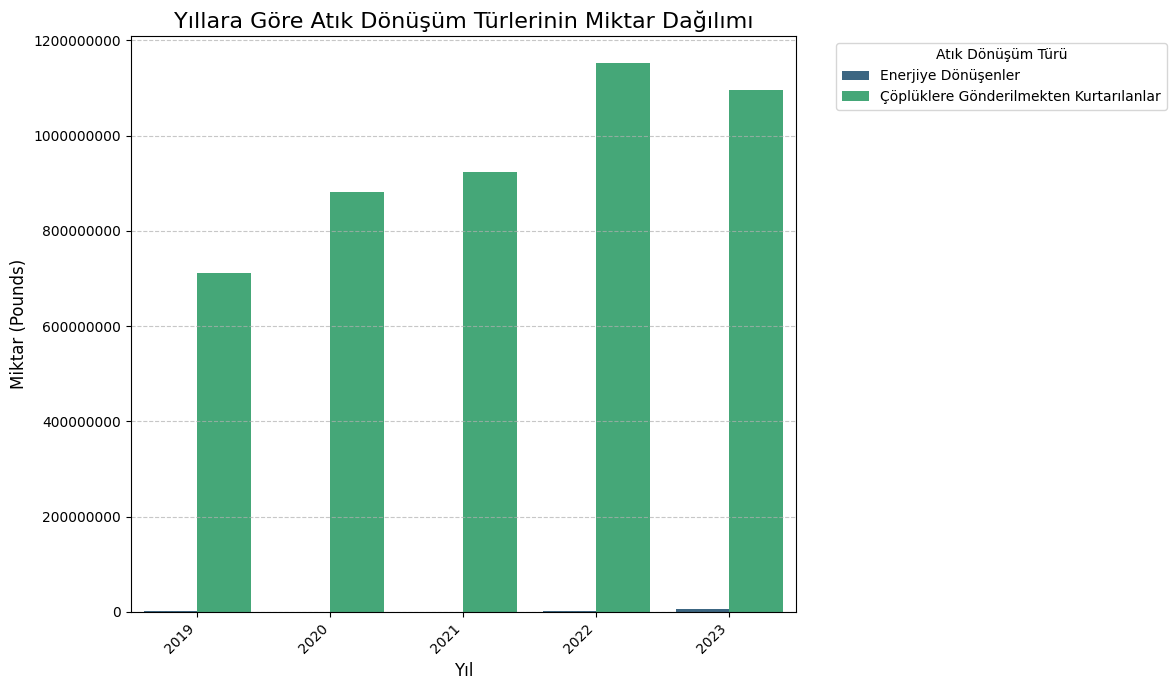

In [3]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='Yıl', y='Miktar (Pounds)', hue='Atık Dönüşüm Türü', palette='viridis')
plt.title('Yıllara Göre Atık Dönüşüm Türlerinin Miktar Dağılımı', fontsize=16)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Miktar (Pounds)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') # Y ekseninde bilimsel notasyonu kaldırma
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Atık Dönüşüm Türü', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()